# Task
Analyze the "Covertype" dataset from the UCI Machine Learning Repository to predict forest cover type. Preprocess the data, train and evaluate multi-class classification models (Random Forest and XGBoost), visualize the confusion matrix and feature importance, compare the models, and perform hyperparameter tuning to identify the best performing model. The dataset is located at "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data".

## Load data

### Subtask:
Load the dataset from the provided URL.


**Reasoning**:
Import pandas, define the URL, load the data into a DataFrame, and display the head and shape of the DataFrame as requested in the instructions.



In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data"
df = pd.read_csv(url, header=None)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

HTTPError: HTTP Error 404: Not Found

**Reasoning**:
The previous attempt to load the data failed due to a 404 HTTP error, indicating the URL is incorrect. I will try a different URL from the UCI Machine Learning Repository website for the Covertype dataset to see if that resolves the issue.



In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
df = pd.read_csv(url, header=None, compression='gzip')

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

First 5 rows of the DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5



Shape of the DataFrame:
(581012, 55)


## Data preprocessing

### Subtask:
Clean and preprocess the data, including handling categorical features and splitting the data into training and testing sets.


**Reasoning**:
Separate features and target, then split the data into training and testing sets.



In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

NameError: name 'train_test_split' is not defined

**Reasoning**:
The previous command failed because `train_test_split` was not imported. I will import it from `sklearn.model_selection` and re-run the code to separate features and target and split the data.



In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (464809, 54)
Shape of X_test: (116203, 54)
Shape of y_train: (464809,)
Shape of y_test: (116203,)


## Model training

### Subtask:
Train multi-class classification models (e.g., Random Forest, XGBoost).


**Reasoning**:
Import the necessary libraries for training the models and instantiate and train the RandomForestClassifier model.



In [5]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Reasoning**:
Instantiate and train the XGBClassifier model.



In [6]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [1 2 3 4 5 6 7]

**Reasoning**:
The XGBoost model expects the target variable to be zero-indexed, but the current target variable `y_train` has values ranging from 1 to 7. Subtract 1 from `y_train` to make it zero-indexed before training the XGBoost model.



In [7]:
y_train_zero_indexed = y_train - 1
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train, y_train_zero_indexed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=7, ...)

## Model evaluation

### Subtask:
Evaluate the trained models using appropriate metrics and visualize the confusion matrix.


**Reasoning**:
Make predictions using the trained models and calculate the evaluation metrics.



Random Forest Model Metrics:
Accuracy: 0.9552
Precision (weighted): 0.9553
Recall (weighted): 0.9552
F1 Score (weighted): 0.9549

XGBoost Model Metrics:
Accuracy: 0.8712
Precision (weighted): 0.8713
Recall (weighted): 0.8712
F1 Score (weighted): 0.8705


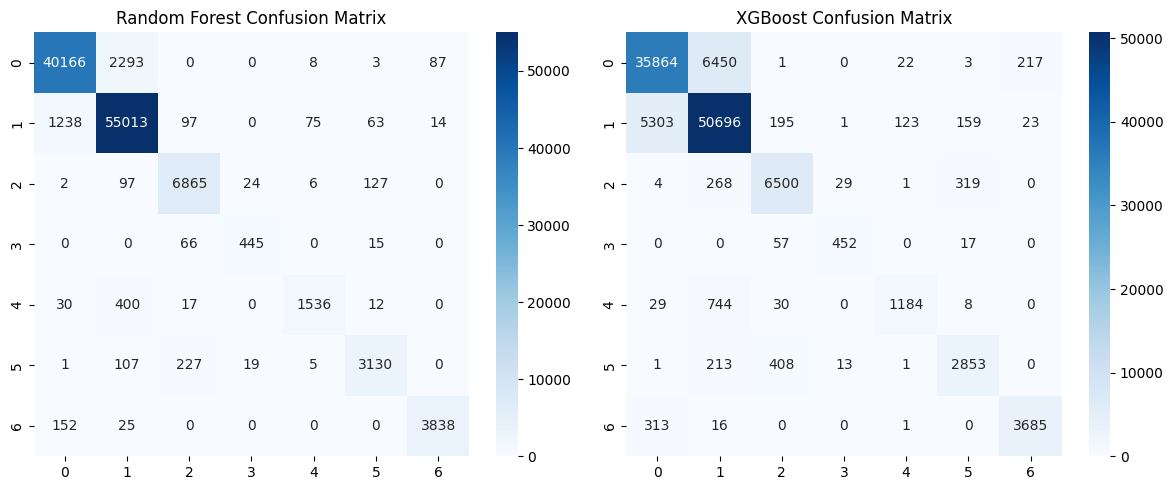

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf_predictions = rf_model.predict(X_test)
xgb_predictions_zero_indexed = xgb_model.predict(X_test)
xgb_predictions = xgb_predictions_zero_indexed + 1

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

print("Random Forest Model Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision (weighted): {rf_precision:.4f}")
print(f"Recall (weighted): {rf_recall:.4f}")
print(f"F1 Score (weighted): {rf_f1:.4f}")

print("\nXGBoost Model Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision (weighted): {xgb_precision:.4f}")
print(f"Recall (weighted): {xgb_recall:.4f}")
print(f"F1 Score (weighted): {xgb_f1:.4f}")

rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.show()

## Feature importance

### Subtask:
Determine and visualize feature importance for the trained models.


**Reasoning**:
Extract, organize, and visualize the feature importances for both the Random Forest and XGBoost models using bar plots.



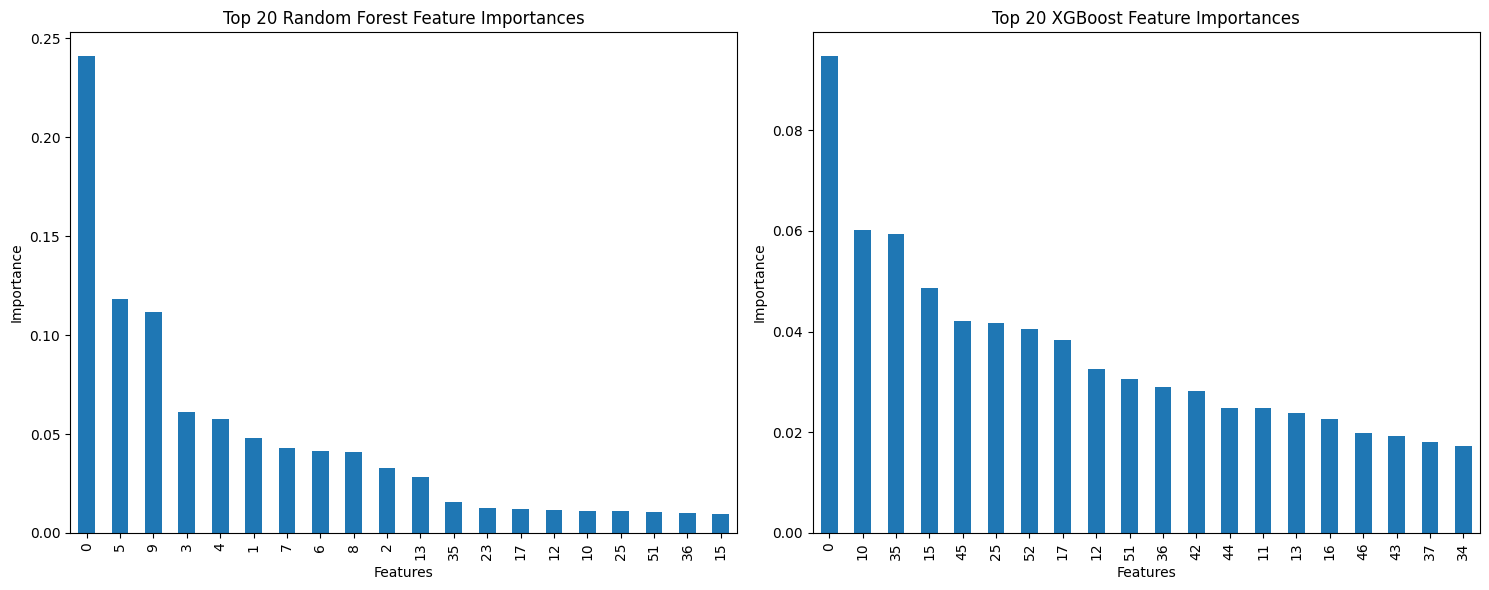

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
rf_feature_importances.head(20).plot(kind='bar')
plt.title('Top 20 Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
xgb_feature_importances.head(20).plot(kind='bar')
plt.title('Top 20 XGBoost Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

## Model comparison

### Subtask:
Compare the performance of different models.


**Reasoning**:
Create a pandas DataFrame to store and display the evaluation metrics for both models.



In [10]:
import pandas as pd

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
}

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

,Metric,Random Forest,XGBoost
0,Accuracy,0.955165,0.871182
1,Precision,0.955270,0.871285
2,Recall,0.955165,0.871182
3,F1-score,0.954922,0.870546


## Hyperparameter tuning

### Subtask:
Perform hyperparameter tuning to optimize model performance.


**Reasoning**:
Import the necessary libraries for hyperparameter tuning and define the parameter grid for the Random Forest model. Initialize GridSearchCV with the model, parameter grid, and cross-validation strategy, then fit it to the training data.



In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [13]:
import joblib

 # Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.joblib')

# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.joblib')

print("Both Random Forest and XGBoost models have been saved to .joblib files.")

Both Random Forest and XGBoost models have been saved to .joblib files.
